<a href="https://www.kaggle.com/code/dymshat/clustering-test?scriptVersionId=246263396" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data

In [1]:
import pandas as pd

#file_path = "/kaggle/input/ukr-pm-reviews/cleaned_reviews.csv"
file_tg = "/kaggle/input/novapost-rev/np_rev.csv"
file_tg="/kaggle/input/telegram-rev/tg.csv"
file_diia='/kaggle/input/diia-rev/diia.csv'
dftrue = pd.read_csv(file_tg)

In [2]:
dftrue

,text,score
0,шик,5
1,не могу уже терпеть ето заблокали просто так к...,3
2,само приложение хорошое но у меня выбил аккаун...,3
3,Мне акк снесли какбы доксеры Me Account= snos Dox,5
4,"Я не можу ввійти, тому що у мене пише двохетап...",1
...,...,...
9681,Доброго вечора. Вчора від мого імені шахраї ви...,1
9682,Круто мать тг,5
9683,Не работает звук. Хотя в настройках всё включено,3
9684,Супер идеально,5


In [3]:
!pip install semantic-text-splitter
from semantic_text_splitter import TextSplitter
from tokenizers import Tokenizer

def semantic_split(df,col='text', max_tokens = 50):
    tokenizer = Tokenizer.from_pretrained("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
    splitter = TextSplitter.from_huggingface_tokenizer(tokenizer, max_tokens)
    #df0 = pd.DataFrame(columns=[col])
    rows = []
    for text in df[col]:
        chunks = splitter.chunks(text)
        for chunk in chunks:
            row={"text":chunk}
            rows.append(row)
    df0 = pd.DataFrame(rows)
    return df0

dfold=semantic_split(dftrue)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 43.2 MB/s eta 0:00:00


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

In [4]:
dfold

,text
0,шик
1,не могу уже терпеть ето заблокали просто так к...
2,didn't even use the trolley at all and they st...
3,само приложение хорошое но у меня выбил аккаун...
4,Мне акк снесли какбы доксеры Me Account= snos Dox
...,...
11168,Як мені користуватися та довіряти надалі Телег...
11169,Круто мать тг
11170,Не работает звук. Хотя в настройках всё включено
11171,Супер идеально


In [5]:
import re
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub(r"http\S+|www.\S+", "", text)  # URLs
    text = re.sub(r"[^a-zA-Zа-яА-Яіїєґ0-9\s.,!?-]", "", text)  # прибрати емодзі, символи
    text = re.sub(r"\s+", " ", text).strip()  # прибрати зайві пробіли
    return text

#df= pd.DataFrame(columns="text")
dfdublic = dfold["text"].apply(clean_text)
dfdublic = pd.DataFrame({"text": dfdublic})

In [6]:
def normalize_text(text):
    text = str(text).lower()  # до нижнього регістру
    text = re.sub(r"[^\w\s]", "", text)  # прибрати пунктуацію
    text = re.sub(r"\s+", " ", text).strip()  # прибрати зайві пробіли
    return text
dfdublic["normalized"] = dfdublic["text"].apply(normalize_text)  # для виявлення дублікатів
df = dfdublic.drop_duplicates(subset="normalized").drop(columns="normalized")

In [7]:
df

,text
0,шик
1,не могу уже терпеть ето заблокали просто так к...
2,didnt even use the trolley at all and they sti...
3,само приложение хорошое но у меня выбил аккаун...
4,мне акк снесли какбы доксеры me account snos dox
...,...
11168,як мені користуватися та довіряти надалі телег...
11169,круто мать тг
11170,не работает звук. хотя в настройках вс включено
11171,супер идеально


# vector

In [8]:
#!pip install InstructorEmbedding
from sentence_transformers import SentenceTransformer, util
import numpy as np
from sklearn.cluster import KMeans
#from InstructorEmbedding import INSTRUCTOR

# Завантажуємо модель

models = {'MiniLM': SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'),
        'LaBSE':SentenceTransformer('sentence-transformers/LaBSE'),
        #'instructor':INSTRUCTOR('hkunlp/instructor-base'),
        'e5-base':SentenceTransformer("intfloat/multilingual-e5-base")
        }

2025-06-19 05:42:06.515634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750311726.710500      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750311726.767659      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/179k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [9]:
def to_e5_format(texts, mode="query"):
    return [f"{mode}: {text}" for text in texts]

def emb_maker(
    model,
    data=df["text"].to_list(),
    mod=0   
):
    if(mod):
        data=to_e5_format(data, mode="query")
    return model.encode(data, normalize_embeddings=True)
    

In [10]:
embeddings_old={}

for key, val in models.items():
    mod=0
    if (key=='e5-base'): mod=1
    embeddings_old[key]=emb_maker(model=val, mod=mod)


Batches:   0%|          | 0/311 [00:00<?, ?it/s]

Batches:   0%|          | 0/311 [00:00<?, ?it/s]

Batches:   0%|          | 0/311 [00:00<?, ?it/s]

In [11]:
embeddings_old

{'MiniLM': array([[-0.0047037 ,  0.01966839,  0.01062701, ..., -0.02456732,
         -0.00413705,  0.04441674],
        [-0.01573922,  0.00832882,  0.01057374, ..., -0.0046319 ,
          0.0206467 ,  0.02002942],
        [ 0.02849486, -0.01630551,  0.04902888, ...,  0.03493941,
          0.00447694,  0.01715246],
        ...,
        [ 0.037622  , -0.02832135,  0.07529581, ...,  0.05676986,
          0.07674003,  0.03482373],
        [ 0.03678349,  0.01156962,  0.00543   , ...,  0.04964036,
         -0.04853505,  0.03347812],
        [-0.05937819,  0.03144554,  0.04879528, ...,  0.0123534 ,
          0.04433317,  0.06286318]], dtype=float32),
 'LaBSE': array([[ 0.03764178, -0.03063287, -0.05815986, ...,  0.01323605,
          0.00423799, -0.00744503],
        [ 0.0514574 ,  0.04091628, -0.04167316, ..., -0.05267122,
         -0.03605841,  0.04307186],
        [ 0.02803208,  0.01890352, -0.05490614, ...,  0.00492406,
         -0.05067263,  0.0582216 ],
        ...,
        [-0.06177193

In [12]:
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
embeddings={}

pca = PCA(n_components=50)


# Потім UMAP
umap_reducer = umap.UMAP(n_components=15, n_neighbors=20, min_dist=0.0)


for key, X in embeddings_old.items():
    X_pca = pca.fit_transform(X)
    X_umap = umap_reducer.fit_transform(X_pca)
    
    embeddings[key] = normalize(X_umap) 

In [13]:
embeddings

{'MiniLM': array([[0.21985696, 0.42511305, 0.33480954, ..., 0.1714395 , 0.13929008,
         0.15406246],
        [0.10332774, 0.4778305 , 0.38382858, ..., 0.15862176, 0.14089221,
         0.1799891 ],
        [0.05948812, 0.45418346, 0.38917282, ..., 0.1799271 , 0.14547653,
         0.17105927],
        ...,
        [0.0273511 , 0.4040102 , 0.33810967, ..., 0.20720349, 0.16407034,
         0.18465349],
        [0.25803554, 0.39777416, 0.34637508, ..., 0.15894815, 0.14718792,
         0.16302836],
        [0.12152524, 0.4278476 , 0.360456  , ..., 0.18275896, 0.1474613 ,
         0.16558994]], dtype=float32),
 'LaBSE': array([[0.34116146, 0.31517696, 0.40020624, ..., 0.20947863, 0.20622043,
         0.26771358],
        [0.4763773 , 0.3218868 , 0.34127268, ..., 0.1806985 , 0.17724691,
         0.21960853],
        [0.47491184, 0.32206288, 0.3433474 , ..., 0.1824181 , 0.17701241,
         0.21961491],
        ...,
        [0.4845092 , 0.32918748, 0.348162  , ..., 0.18567051, 0.17550267,


In [14]:
for key, val in embeddings.items():
    norms = np.linalg.norm(val, axis=1)
    print("Середня довжина векторів:", norms.mean())


Середня довжина векторів: 1.0
Середня довжина векторів: 1.0
Середня довжина векторів: 1.0


In [15]:
import umap

reduced={}
for key, val in embeddings_old.items():
    umap_model = umap.UMAP(n_components=3, random_state=42)
    reduced[key] = umap_model.fit_transform(val)


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [16]:
import matplotlib.pyplot as plt

def grafics(embeddings, labels=None, show_clusters=False):
    # Зменшуємо розмірність до 2D (PCA або інший метод)
    
    for key, val in embeddings.items():
        
        plt.figure(figsize=(10, 6))
        embeddings_2d=reduced[key]
        if show_clusters and labels is not None:
        # Якщо кластеризація увімкнена, розфарбовуємо точки по кластерах
            scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels[key], cmap='tab10', s=5)
            plt.legend(*scatter.legend_elements(), title="Кластери")
        else:
        # Інакше — просто точки, усі одного кольору
            plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='gray', s=50)

        plt.title("2D Візуалізація ембедінгів "+ key + (" з кластерами" if show_clusters else ""))
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.grid(True)
        plt.show()



In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Необхідно для 3D-графіків

def grafics_3d(embeddings, reduced, labels=None, show_clusters=False):
    """
    Побудова 3D-графіків для ембедінгів після зниження розмірності.

    :param embeddings: словник з назвами моделей і ембедінгами (не використовується безпосередньо, тільки для ключів)
    :param reduced: словник з назвами моделей і їх зниженими до 3D розмірності ембедінгами (наприклад, після PCA/Umap)
    :param labels: словник з назвами моделей і масивами кластерів
    :param show_clusters: чи показувати кластери різними кольорами
    """
    for key, val in embeddings.items():
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        embeddings_3d = reduced[key]

        if show_clusters and labels is not None:
            scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
                                 c=labels[key], cmap='tab10', s=7)
            legend1 = ax.legend(*scatter.legend_elements(), title="Кластери")
            ax.add_artist(legend1)
        else:
            ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
                       color='gray', s=10)

        ax.set_title("3D Візуалізація ембедінгів " + key + (" з кластерами" if show_clusters else ""))
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
        plt.tight_layout()
        plt.show()


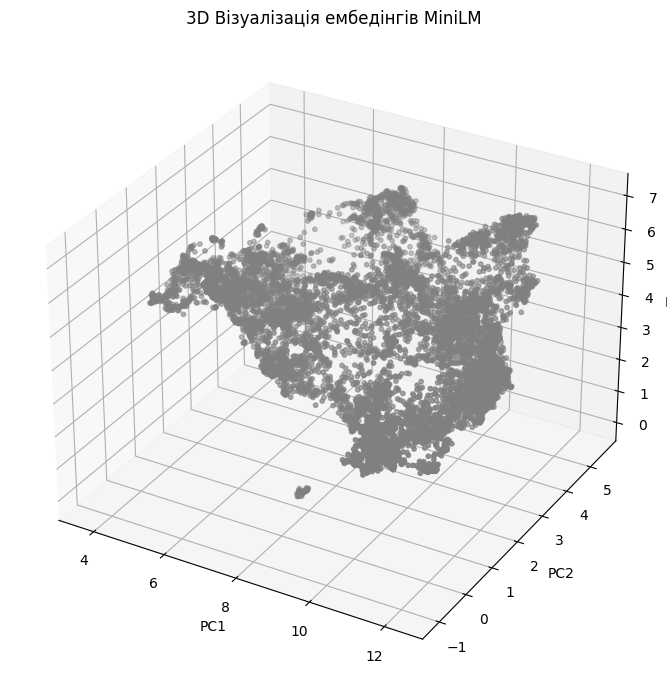

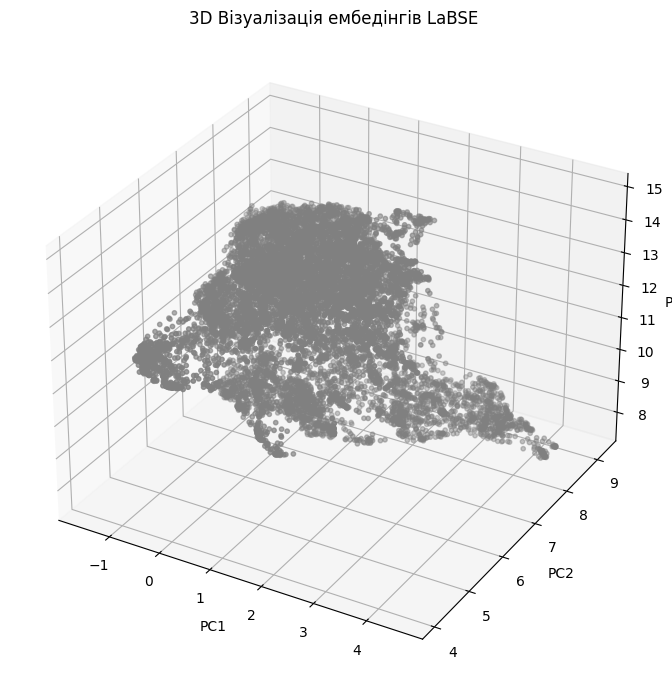

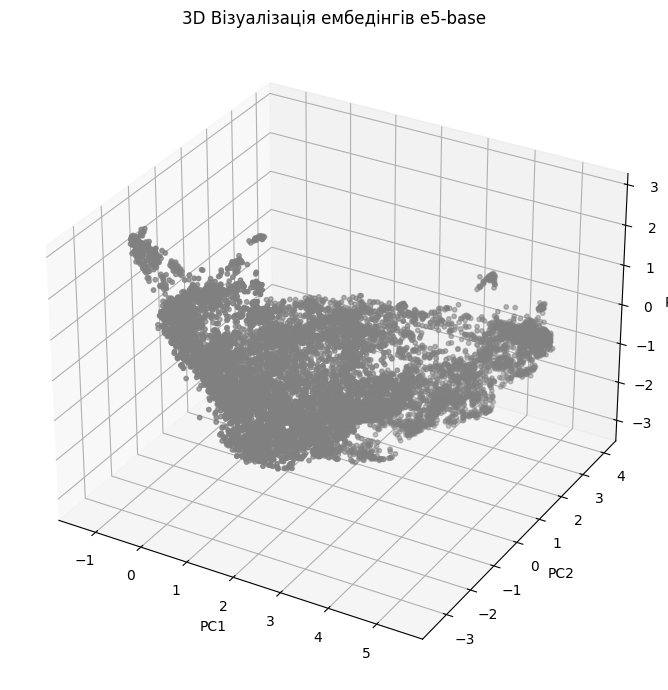

In [18]:
grafics_3d(embeddings, reduced, show_clusters=False) 

# Cluster

## HDBSCAN

In [19]:
df1=df.copy()

In [20]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=25,        
    min_samples=10,             
    metric='manhattan',
    cluster_selection_method='eom',  
    prediction_data=True,
    
)

for key, val in embeddings.items():
    df1[key]=clusterer.fit_predict(val)


# Postprocesing

## Metric

In [21]:
for col in df1.columns[1:]:
    print(col)
    print(f"Кількість кластерів: {len(np.unique(df1[col][df1[col] >= 0]))}")
    print(f"Кількість шуму: {np.sum(df1[col] == -1)}")


MiniLM
Кількість кластерів: 67
Кількість шуму: 3674
LaBSE
Кількість кластерів: 62
Кількість шуму: 4518
e5-base
Кількість кластерів: 56
Кількість шуму: 3262


In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

def evaluate_models(Xs, labels_list, names):
    scores = {
        "silhouette": [],
        "calinski": [],
        "davies": []
    }
    noise_counts = []

    for X, labels in zip(Xs, labels_list):
        scores["silhouette"].append(silhouette_score(X, labels))
        scores["calinski"].append(calinski_harabasz_score(X, labels))
        scores["davies"].append(davies_bouldin_score(X, labels))
        noise_counts.append(np.sum(np.array(labels) == -1))  # кількість шуму

    # Демократичне голосування
    votes = np.zeros(len(names), dtype=int)

    # Метрики, які максимізуються
    for metric in ["silhouette", "calinski"]:
        best_idx = np.argmax(scores[metric])
        votes[best_idx] += 1

    # Метрики, які мінімізуються
    best_idx = np.argmin(scores["davies"])
    votes[best_idx] += 1

    # Визначення переможця
    max_votes = np.max(votes)
    candidates = [i for i, v in enumerate(votes) if v == max_votes]

    if len(candidates) == 1:
        final_idx = candidates[0]
    else:
        # Тайбрейкер: найменше шуму
        final_idx = min(candidates, key=lambda i: noise_counts[i])

    # Повертаємо повну інформацію
    result = {
        "best_name": names[final_idx],
        #"best_name": final_idx,
        "votes": dict(zip(names, votes)),
        "scores": {metric: dict(zip(names, scores[metric])) for metric in scores},
        "noise_counts": dict(zip(names, noise_counts))
    }
    return result


In [23]:
lister = ['MiniLM', 'LaBSE', 'e5-base']
n_cluct=10

In [24]:
result = evaluate_models([embeddings[lister[0]], embeddings[lister[1]], embeddings[lister[2]]],
                         [df1[lister[0]], df1[lister[1]], df1[lister[2]]],lister )

print(f"Найкраща модель: {result['best_name']}")
print("Голосування за метриками:")
for name, v in result["votes"].items():
    print(f"  {name}: {v} голосів")

print("\nКількість шуму (label = -1):")
for name, n in result["noise_counts"].items():
    print(f"  {name}: {n} точок")

print("\nМетрики кластеризації:")
for metric, model_scores in result["scores"].items():
    print(f"\n{metric.upper()}:")
    for name, score in model_scores.items():
        print(f"  {name}: {score:.4f}")

n_l=result['best_name']

Найкраща модель: e5-base
Голосування за метриками:
  MiniLM: 0 голосів
  LaBSE: 1 голосів
  e5-base: 2 голосів

Кількість шуму (label = -1):
  MiniLM: 3674 точок
  LaBSE: 4518 точок
  e5-base: 3262 точок

Метрики кластеризації:

SILHOUETTE:
  MiniLM: 0.0648
  LaBSE: -0.0412
  e5-base: 0.1148

CALINSKI:
  MiniLM: 325.2900
  LaBSE: 409.4132
  e5-base: 770.4012

DAVIES:
  MiniLM: 1.1703
  LaBSE: 1.0592
  e5-base: 1.1661


## Plots

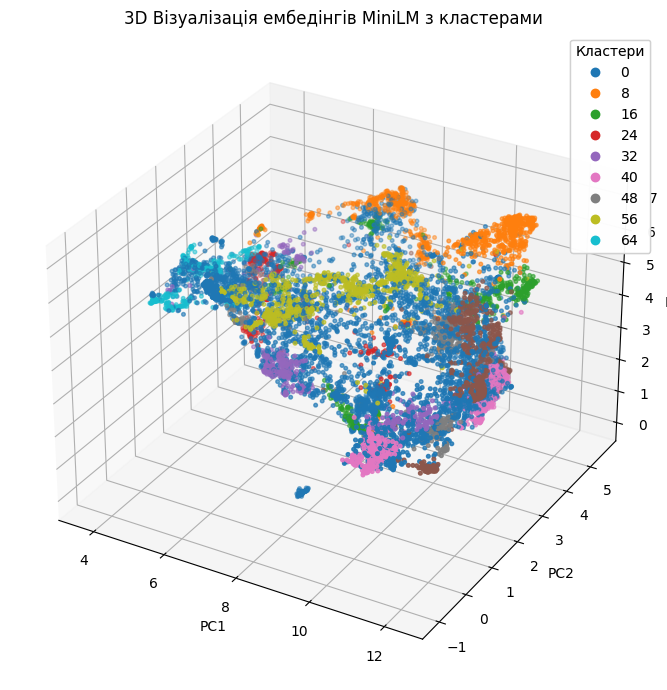

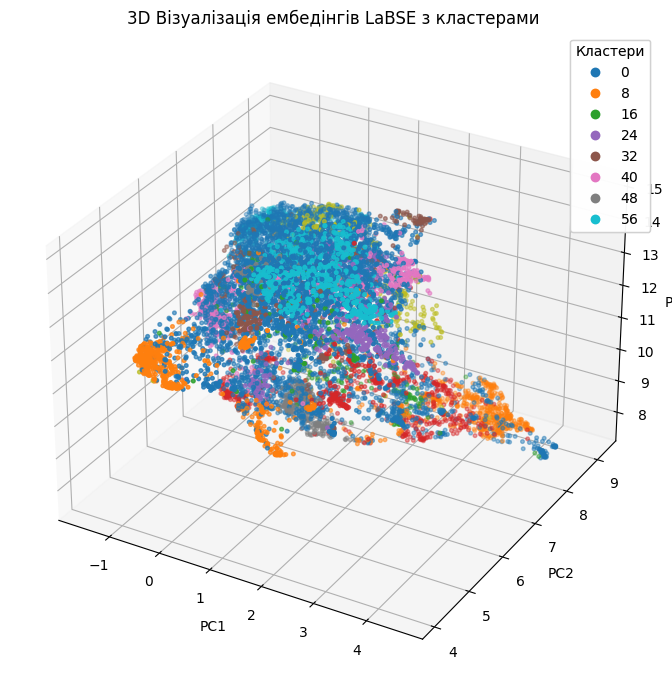

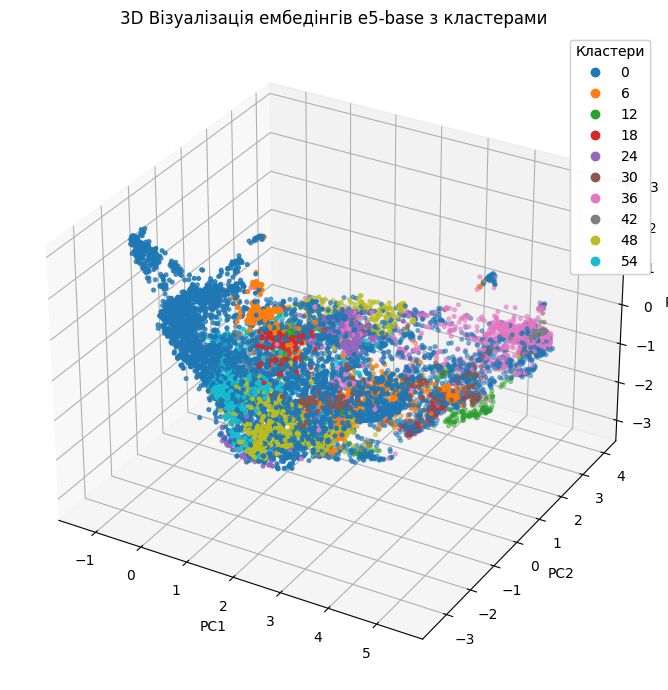

In [25]:
grafics_3d(embeddings, reduced, labels=df1, show_clusters=True) 

## Names

In [26]:
df1

,text,MiniLM,LaBSE,e5-base
0,шик,-1,11,37
1,не могу уже терпеть ето заблокали просто так к...,-1,-1,-1
2,didnt even use the trolley at all and they sti...,-1,-1,0
3,само приложение хорошое но у меня выбил аккаун...,-1,39,2
4,мне акк снесли какбы доксеры me account snos dox,-1,58,31
...,...,...,...,...
11168,як мені користуватися та довіряти надалі телег...,33,25,18
11169,круто мать тг,21,20,37
11170,не работает звук. хотя в настройках вс включено,15,-1,2
11171,супер идеально,21,-1,-1


In [27]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def get_representative_texts(lister, texts, labels):
    reps = {}
    
    # Перетворюємо texts у список, щоб уникнути проблем з індексами
    texts_list = texts.tolist() if hasattr(texts, 'tolist') else list(texts)
    
    for key in lister:
        rep_texts = {}
        for cluster_id in np.unique(labels[key]):
            # Знаходимо індекси елементів в кластері
            idxs = np.where(labels[key] == cluster_id)[0]
            
            # Отримуємо embeddings для кластера
            cluster_embs = val[idxs]  # Переконайтеся, що val визначена
            
            # Обчислюємо центр кластера
            center = cluster_embs.mean(axis=0, keepdims=True)
            
            # Обчислюємо подібність до центру
            sims = cosine_similarity(center, cluster_embs)[0]
            
            # Знаходимо індекс найбільш репрезентативного тексту
            best_local_idx = np.argmax(sims)
            rep_idx = idxs[best_local_idx]
            
            # Використовуємо індекс для доступу до тексту
            rep_texts[cluster_id] = texts_list[rep_idx]
            
        reps[key] = rep_texts
    return reps

# Альтернативний варіант з використанням iloc для pandas Series
def get_representative_texts_v2(lister, texts, labels):
    reps = {}
    
    for key in lister:
        rep_texts = {}
        for cluster_id in np.unique(labels[key]):
            # Знаходимо індекси елементів в кластері
            idxs = np.where(labels[key] == cluster_id)[0]
            
            # Отримуємо embeddings для кластера
            cluster_embs = val[idxs]  # Переконайтеся, що val визначена
            
            # Обчислюємо центр кластера
            center = cluster_embs.mean(axis=0, keepdims=True)
            
            # Обчислюємо подібність до центру
            sims = cosine_similarity(center, cluster_embs)[0]
            
            # Знаходимо індекс найбільш репрезентативного тексту
            best_local_idx = np.argmax(sims)
            rep_idx = idxs[best_local_idx]
            
            # Використовуємо iloc для безпечного доступу до pandas Series
            rep_texts[cluster_id] = texts.iloc[rep_idx]
            
        reps[key] = rep_texts
    return reps

# Використання:
lister = ['MiniLM', 'LaBSE', 'e5-base']

# Варіант 1: з перетворенням у список
names = get_representative_texts(lister, df1['text'], df1)
names
# Або варіант 2: з використанням iloc
# names = get_representative_texts_v2(lister, df1['text'], df1)

{'MiniLM': {-1: 'якщо можно було б поставити -4848758 зіпок я би поставила',
  0: 'повените не може заеструватись пж зробите обнову ізправкою 1 зірка тому що не мож заеструватись',
  1: 'москальський шпигун у вашому телефоні.',
  2: 'ввожу номер грузит 10 лет',
  3: 'пропала сторінка і нехоче заходити на ню',
  4: 'мда почему я неприходит код ??....',
  5: 'просто пушка дуже зручно',
  6: 'забагато каналів з рекламами',
  7: 'це найкраще місце для спілкування',
  8: 'пишеться де сповіщати, відео, дні пишуться на англійській мові',
  9: 'норм пайдт',
  10: 'класне приллженя',
  11: 'надсилати різні повідомлення відео спілкуватися по відеозаписами.',
  12: 'найкращий додаток для того щоб переписуватися',
  13: 'дякую за програму',
  14: 'чому не проходить транзакція щоб поповнити usdt????',
  15: '3 тому що не завжди грузять голосові та кружечки',
  16: 'дзвінок збивається сам по собі навіть коли прекрасний інтернет всеодно перепідключення',
  17: 'допоможіть не можу зробити свій канал і

## TOP word

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
extended_ukrainian_stop_words = [
    # Прийменники
    'в', 'на', 'з', 'до', 'від', 'за', 'про', 'по', 'під', 'над', 'між', 'перед',
    'після', 'через', 'біля', 'коло', 'при', 'без', 'для', 'крім', 'окрім',
    
    # Сполучники
    'і', 'та', 'й', 'або', 'чи', 'але', 'а', 'проте', 'однак', 'тому', 'оскільки',
    'якщо', 'хоча', 'щоб', 'аби', 'коли', 'поки', 'як', 'наче', 'мов', 'немов',
    
    # Займенники
    'я', 'ти', 'він', 'вона', 'воно', 'ми', 'ви', 'вони',
    'мене', 'тебе', 'його', 'її', 'нас', 'вас', 'їх',
    'мій', 'твій', 'наш', 'ваш', 'свій',
    'цей', 'ця', 'це', 'ці', 'той', 'та', 'те', 'ті',
    'який', 'яка', 'яке', 'які', 'котрий', 'котра', 'котре', 'котрі',
    'хто', 'що', 'де', 'коли', 'куди', 'звідки', 'чому', 'навіщо',
    
    # Частки
    'не', 'ні', 'би', 'б', 'же', 'ж', 'ось', 'от', 'навіть', 'хіба', 'невже',
    
    # Вигуки
    'так', 'ні', 'да', 'ну', 'о', 'ой', 'ах', 'ох', 'ех', 'ух',
    
    # Прислівники
    'тут', 'там', 'де', 'всюди', 'ніде', 'скрізь', 'дуже', 'більш', 'менш',
    'найбільш', 'найменш', 'також', 'теж', 'лише', 'тільки', 'навіть',
    'ще', 'уже', 'завжди', 'ніколи', 'іноді', 'часто', 'рідко',
    
    # Дієслова-зв'язки та допоміжні
    'є', 'був', 'була', 'було', 'були', 'буде', 'будуть', 'бути',
    'мати', 'має', 'мають', 'мав', 'мала', 'мало', 'мали',
    'може', 'можна', 'треба', 'потрібно', 'слід', 'варто',
    
    # Числівники
    'один', 'одна', 'одне', 'два', 'дві', 'три', 'чотири', "п'ять",
    'шість', 'сім', 'вісім', "дев'ять", 'десять',
    'перший', 'друга', 'третє', 'багато', 'мало', 'кілька', 'декілька',
    'все', 'всі', 'всє', 'кожен', 'кожна', 'кожне', 'будь',
    
    # Інші службові слова
    'ось', 'от', 'ну', 'то', 'це', 'це', 'таке', 'така', 'такий', 'такі'
]

vectorizer_stopword = TfidfVectorizer(
    max_features=1000, 
    stop_words=extended_ukrainian_stop_words
)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
cluster_titles={}
def get_cluster_keywords(df, text_column='text', cluster_column='cluster', top_n=5):
    cluster_names = {}
    for cluster in df[cluster_column].unique():
        cluster_texts = df[df[cluster_column] == cluster][text_column].tolist()
        vectorizer = TfidfVectorizer(max_features=1000, stop_words=extended_ukrainian_stop_words)  # або stop_words=None для української
        X = vectorizer.fit_transform(cluster_texts)
        top_indices = X.sum(axis=0).A1.argsort()[::-1][:top_n]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_indices]
        cluster_names[cluster] = ", ".join(top_words)
    return cluster_names

# використання:
for i in embeddings:
    cluster_titles[i] = get_cluster_keywords(df1, text_column="text", cluster_column=i)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['дев', 'ять'] not in stop_words.
  warnings.warn(


## Clouds

In [30]:
import nltk
from nltk.corpus import stopwords

# Завантажуємо список українських стоп-слів
nltk.download("stopwords")
ukrainian_stopwords = set(stopwords.words("russian"))  # Українських в NLTK немає, тому беремо російські (схожі)
#extra_stopwords = {"це", "та", "і", "в", "у", "на", "що", "як", "до", "зі", "від", "по", "чи", "а", "або", "не", "ми", "ви", "для"}
ukrainian_stopwords.update(extended_ukrainian_stop_words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import re

def clean_text(text):
    # Перетворюємо у нижній регістр
    text = text.lower()
    
    # Видаляємо цифри, знаки пунктуації та зайві пробіли
    text = re.sub(r"[^\w\s]", "", text)  # Видаляємо пунктуацію
    text = re.sub(r"\d+", "", text)  # Видаляємо числа
    
    # Видаляємо стоп-слова
    words = text.split()
    filtered_words = [word for word in words if word not in ukrainian_stopwords]
    
    # Об'єднуємо назад у текст
    return " ".join(filtered_words)
df_c=df1.copy()
df_c["text"] = df["text"].astype(str).apply(clean_text)

In [32]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def predict_sentiment_batch(
    df,
    text_column,
    model_path,
    batch_size=32,
    label_map=None,
    device=None,
    max_length=512,
    sentiment="sentiment"
):
    # Визначення пристрою
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Завантаження токенайзера та моделі
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Кастомний Dataset
    class TextDataset(Dataset):
        def __init__(self, texts):
            self.texts = texts

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            return self.texts[idx]

    # Тексти та DataLoader
    texts = df[text_column].tolist()
    dataset = TextDataset(texts)

    def collate_fn(batch_texts):
        return tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )

    loader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn)

    # Інференс
    all_preds = []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())

    # Додавання до датафрейму
    df = df.copy()
    df[sentiment] = all_preds

    if label_map:
        df[sentiment] = df["sentiment"].map(label_map)

    return df

In [33]:
model_path = "/kaggle/input/gpm_sentiment_bin/transformers/default/2/model_5ep"

In [34]:
df1 = predict_sentiment_batch(
    df=df1,
    text_column="text",
    model_path=model_path,
    sentiment="sentiment"
)
print("end")

end


In [35]:
n_cluct=19

In [36]:
score_nl=df1[df1[n_l]==n_cluct]['sentiment'].mean()

Центровий відгук: додаток шикарний робіть гарні оновлення


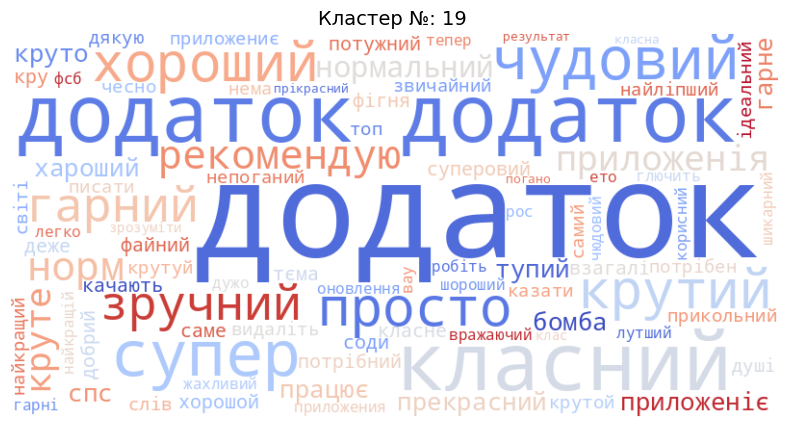

In [37]:
from wordcloud import WordCloud
def plot_wordcloud(text, title, color="black"):
    wordcloud = WordCloud(width=800, height=400, background_color=color, colormap="coolwarm").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# 🔹 Хмаринка для позитивних відгуків
if (score_nl>=0.5):
    color="white"
else:
    color="black"
reviews = " ".join(df_c[df_c[n_l] == n_cluct]["text"].astype(str))
print( f"Центровий відгук: {names[n_l][n_cluct]}")
plot_wordcloud(reviews, f"Кластер №: {n_cluct} ", color)

# Output results

In [38]:
df_fin=df1.copy()
df_fin['text']=dfold['text']

In [39]:
df_win=df_fin[['text','sentiment', n_l]].copy()
df_win

,text,sentiment,e5-base
0,шик,1,37
1,не могу уже терпеть ето заблокали просто так к...,0,-1
2,didn't even use the trolley at all and they st...,0,0
3,само приложение хорошое но у меня выбил аккаун...,1,2
4,Мне акк снесли какбы доксеры Me Account= snos Dox,0,31
...,...,...,...
11168,Як мені користуватися та довіряти надалі Телег...,1,18
11169,Круто мать тг,1,37
11170,Не работает звук. Хотя в настройках всё включено,0,2
11171,Супер идеально,1,-1


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

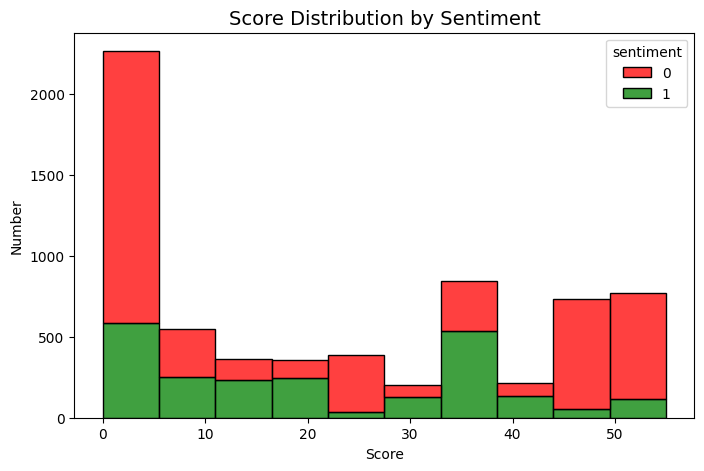

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))

# Вибираємо кольори для позитивного і негативного аналізу
palette = {1: "green", 0: "red"}

# Створюємо boxplot (графік розподілу)
sns.histplot(data=df_win[df_win[n_l]>-1], x=n_l, hue="sentiment", multiple="stack", palette=palette, bins=10)

# Додаємо заголовок
plt.title("Score Distribution by Sentiment", fontsize=14)
plt.xlabel("Score")
plt.ylabel("Number")

# Відображаємо графікс
plt.show()

In [41]:
df_fin.to_csv("semantic_cluster.csv", index=False, encoding="utf-8")

# User mode

In [42]:
print(f"доступні наступні кластери: від 0 до {df1[n_l].max()}")


доступні наступні кластери: від 0 до 55


In [43]:
n_cluct=54

Центровий відгук: взломано акаунт телеграм як звернутися до техпідтримки
Теги кластеру: телеграм, зламали, робити, мені, відновити
Оцінка позитивності кластеру 35.294117647058826 %


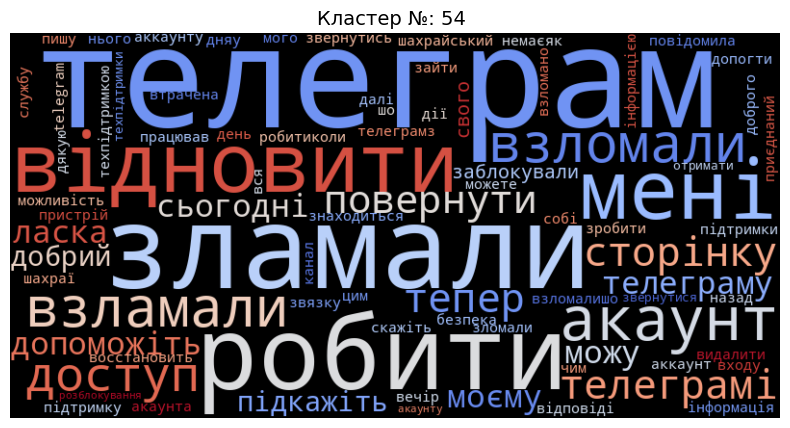

In [44]:
score_nl=df1[df1[n_l]==n_cluct]['sentiment'].mean()
if (score_nl>=0.5):
    color="white"
else:
    color="black"
reviews = " ".join(df_c[df_c[n_l] == n_cluct]["text"].astype(str))
print( f"Центровий відгук: {names[n_l][n_cluct]}")
print( f"Теги кластеру: {cluster_titles[n_l][n_cluct]}")
print(f'Оцінка позитивності кластеру {score_nl*100} %')
plot_wordcloud(reviews, f"Кластер №: {n_cluct} ", color)